# I. Classification binaire 
## 1. Dataset 
Nous allons créer un dataset pour simuler un problème de classification binaire. La
bibliothèque Scikit-Learn nous permet de créer des données binaire à l’aide de la
méthode make circles().

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Création du jeu de données avec make_circles()
X, y = make_circles(n_samples=1000, noise=0.1, random_state=42, factor=0.5)



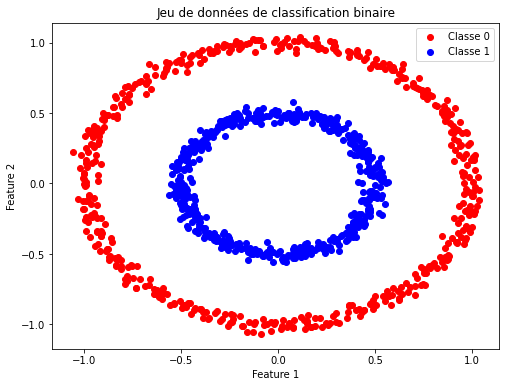

Dimensions du jeu de données X : (1000, 2)
Dimensions du jeu de données y : (1000,)


In [2]:
from sklearn.datasets import make_circles

# Création du jeu de données avec make_circles()
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42, factor=0.5)

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Classe 1')
plt.title('Jeu de données de classification binaire')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Affichage des dimensions du jeu de données
print("Dimensions du jeu de données X :", X.shape)
print("Dimensions du jeu de données y :", y.shape)



Ce dataset nécessite une fonction non linéaire pour séparer ses classes. Les données générées par la méthode make_circles() sont arrangées en deux cercles concentriques. Il n'est pas possible de séparer linéairement ces deux classes à l'aide d'une seule ligne droite. Une frontière de décision non linéaire, telle qu'un cercle, serait nécessaire pour séparer efficacement les classes dans cet ensemble de données.

In [3]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'apprentissage et de test
print("Dimensions de X_train :", X_train.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de X_test :", X_test.shape)
print("Dimensions de y_test :", y_test.shape)


Dimensions de X_train : (800, 2)
Dimensions de y_train : (800,)
Dimensions de X_test : (200, 2)
Dimensions de y_test : (200,)


In [4]:
# 2. Définition du modèle
## 2.1 Cycle de vie d’un modèle :

Un modèle a un cycle de vie. Les cinq étapes du cycle de vie sont les suivantes :
1. Définir le modèle
2. Compiler le modèle
3. Entrainer le modèle
4. Évaluer le modèle
5. Faire des prédictions

## Définition du modèle FCNN :


In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
# Création du modèle séquentiel
model = Sequential()

model.add(Dense(5, activation='sigmoid', input_shape=(2,)))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


## 2.3 Compilation du modèle : 

In [6]:
from keras.optimizers import SGD

model.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# Création du modèle séquentiel
model = Sequential()

# Ajout d'une couche entièrement connectée avec 100 neurones cachés
model.add(Dense(5, activation='sigmoid', input_shape=(2,)))

# Ajout de la couche de sortie avec une activation sigmoid pour la classification binaire
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle avec l'entropie croisée binaire et l'optimiseur SGD
model.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))




Epoch 1/100
25/25 [==============================] - 2s 37ms/step - loss: 0.6936 - accuracy: 0.5512 - val_loss: 0.6954 - val_accuracy: 0.5450
Epoch 2/100
25/25 [==============================] - 0s 14ms/step - loss: 0.6935 - accuracy: 0.5450 - val_loss: 0.6953 - val_accuracy: 0.5450
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6935 - accuracy: 0.5462 - val_loss: 0.6953 - val_accuracy: 0.5400
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 0.6935 - accuracy: 0.5412 - val_loss: 0.6952 - val_accuracy: 0.5400
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.5375 - val_loss: 0.6952 - val_accuracy: 0.5300
Epoch 6/100
25/25 [==============================] - 0s 9ms/step - loss: 0.6934 - accuracy: 0.5250 - val_loss: 0.6952 - val_accuracy: 0.5200
Epoch 7/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.5325 - val_loss: 0.6951 - val_accuracy: 0.5150
Epoch 8/100

### augmenter le nombre d'epoch

In [8]:
model = Sequential()

model.add(Dense(5, activation='sigmoid', input_shape=(2,)))


model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/400
25/25 [==============================] - 2s 28ms/step - loss: 0.7067 - accuracy: 0.5688 - val_loss: 0.6932 - val_accuracy: 0.5800
Epoch 2/400
25/25 [==============================] - 0s 8ms/step - loss: 0.7058 - accuracy: 0.5487 - val_loss: 0.6926 - val_accuracy: 0.5600
Epoch 3/400
25/25 [==============================] - 0s 8ms/step - loss: 0.7051 - accuracy: 0.5425 - val_loss: 0.6922 - val_accuracy: 0.5550
Epoch 4/400
25/25 [==============================] - 0s 14ms/step - loss: 0.7046 - accuracy: 0.5312 - val_loss: 0.6918 - val_accuracy: 0.5450
Epoch 5/400
25/25 [==============================] - 0s 12ms/step - loss: 0.7042 - accuracy: 0.5250 - val_loss: 0.6916 - val_accuracy: 0.5500
Epoch 6/400
25/25 [==============================] - 0s 9ms/step - loss: 0.7038 - accuracy: 0.5213 - val_loss: 0.6914 - val_accuracy: 0.5450
Epoch 7/400
25/25 [==============================] - 0s 13ms/step - loss: 0.7035 - accuracy: 0.5200 - val_loss: 0.6913 - val_accuracy: 0.5350
Epoch 8/4

<AxesSubplot:>

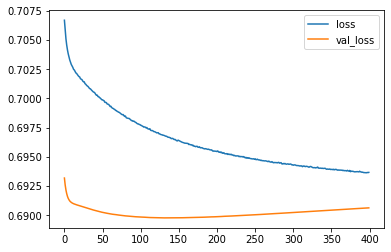

In [9]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

 accuracy: 0.5450 - val_loss: 0.6922 - val_accuracy: 0.5250

### changer la fonction d'activiation

Epoch 1/100
25/25 [==============================] - 2s 39ms/step - loss: 0.6977 - accuracy: 0.4988 - val_loss: 0.6977 - val_accuracy: 0.5100
Epoch 2/100
25/25 [==============================] - 0s 12ms/step - loss: 0.6960 - accuracy: 0.4900 - val_loss: 0.6963 - val_accuracy: 0.4950
Epoch 3/100
25/25 [==============================] - 1s 25ms/step - loss: 0.6944 - accuracy: 0.4900 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 14ms/step - loss: 0.6930 - accuracy: 0.4837 - val_loss: 0.6937 - val_accuracy: 0.5100
Epoch 5/100
25/25 [==============================] - 0s 14ms/step - loss: 0.6915 - accuracy: 0.4825 - val_loss: 0.6925 - val_accuracy: 0.5100
Epoch 6/100
25/25 [==============================] - 0s 11ms/step - loss: 0.6902 - accuracy: 0.4875 - val_loss: 0.6913 - val_accuracy: 0.5050
Epoch 7/100
25/25 [==============================] - 0s 17ms/step - loss: 0.6888 - accuracy: 0.4988 - val_loss: 0.6902 - val_accuracy: 0.5100
Epoch 

<AxesSubplot:>

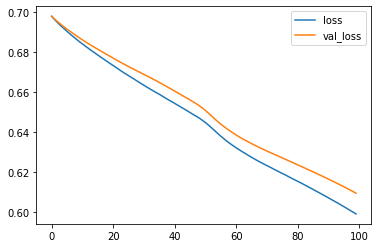

In [10]:
model_change_acti_function = Sequential()

model_change_acti_function.add(Dense(5, activation='relu', input_shape=(2,)))

model_change_acti_function.add(Dense(1, activation='sigmoid'))

model_change_acti_function.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])

history_change_acti_function = model_change_acti_function.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
history_change_acti_function_df = pd.DataFrame(history_change_acti_function.history)
history_change_acti_function_df.loc[:, ['loss', 'val_loss']].plot()

accuracy: 0.7663 - val_loss: 0.6099 - val_accuracy: 0.7450

### Changer la methode d'optimisation

Epoch 1/100
25/25 [==============================] - 2s 20ms/step - loss: 0.7003 - accuracy: 0.5375 - val_loss: 0.6997 - val_accuracy: 0.5600
Epoch 2/100
25/25 [==============================] - 0s 13ms/step - loss: 0.6993 - accuracy: 0.5300 - val_loss: 0.6988 - val_accuracy: 0.5550
Epoch 3/100
25/25 [==============================] - 0s 9ms/step - loss: 0.6989 - accuracy: 0.5225 - val_loss: 0.6982 - val_accuracy: 0.5350
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 0.6982 - accuracy: 0.5200 - val_loss: 0.6978 - val_accuracy: 0.5350
Epoch 5/100
25/25 [==============================] - 0s 11ms/step - loss: 0.6978 - accuracy: 0.5125 - val_loss: 0.6975 - val_accuracy: 0.5450
Epoch 6/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6975 - accuracy: 0.5163 - val_loss: 0.6972 - val_accuracy: 0.5200
Epoch 7/100
25/25 [==============================] - 0s 11ms/step - loss: 0.6972 - accuracy: 0.5025 - val_loss: 0.6969 - val_accuracy: 0.5100
Epoch 8/

<AxesSubplot:>

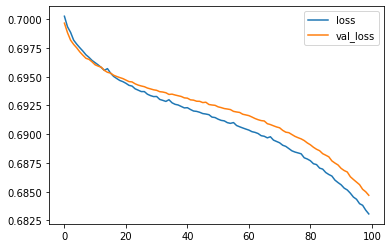

In [11]:
model_change_opt = Sequential()

# Ajout d'une couche entièrement connectée avec 100 neurones cachés
model_change_opt.add(Dense(5, activation='sigmoid', input_shape=(2,)))

# Ajout de la couche de sortie avec une activation sigmoid pour la classification binaire
model_change_opt.add(Dense(1, activation='sigmoid'))

# Compilation du modèle avec l'entropie croisée binaire et l'optimiseur SGD
model_change_opt.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Entraînement du modèle
history_change_opt = model_change_opt.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
history_change_opt_df = pd.DataFrame(history_change_opt.history)
history_change_opt_df.loc[:, ['loss', 'val_loss']].plot()

accuracy: 0.6862 - val_loss: 0.6861 - val_accuracy: 0.6000

### changer le nombre de neurones de la couche cachée

Epoch 1/100
25/25 [==============================] - 2s 31ms/step - loss: 0.6817 - accuracy: 0.5038 - val_loss: 0.6840 - val_accuracy: 0.5200
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6797 - accuracy: 0.5113 - val_loss: 0.6823 - val_accuracy: 0.5400
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6778 - accuracy: 0.5312 - val_loss: 0.6805 - val_accuracy: 0.5700
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 0.6759 - accuracy: 0.5512 - val_loss: 0.6788 - val_accuracy: 0.5900
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6740 - accuracy: 0.5650 - val_loss: 0.6771 - val_accuracy: 0.6000
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6721 - accuracy: 0.5900 - val_loss: 0.6754 - val_accuracy: 0.6050
Epoch 7/100
25/25 [==============================] - 0s 9ms/step - loss: 0.6702 - accuracy: 0.6050 - val_loss: 0.6737 - val_accuracy: 0.6100
Epoch 8/100


<AxesSubplot:>

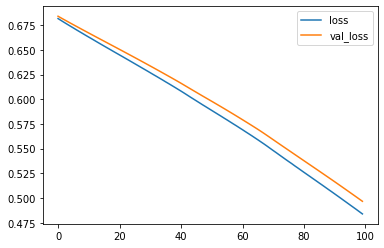

In [12]:
model_change_neurons_number = Sequential()

# Ajout d'une couche entièrement connectée avec 100 neurones cachés
model_change_neurons_number.add(Dense(20, activation='relu', input_shape=(2,)))

# Ajout de la couche de sortie avec une activation sigmoid pour la classification binaire
model_change_neurons_number.add(Dense(1, activation='sigmoid'))

# Compilation du modèle avec l'entropie croisée binaire et l'optimiseur SGD
model_change_neurons_number.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])

# Entraînement du modèle
history_change_neurons_number = model_change_neurons_number.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
history_change_neurons_number_df = pd.DataFrame(history_change_neurons_number.history)
history_change_neurons_number_df.loc[:, ['loss', 'val_loss']].plot()

loss: 0.5169 - accuracy: 1.0000 - val_loss: 0.5312 - val_accuracy: 1.0000

1661/1661 [==============================] - 8s 5ms/step


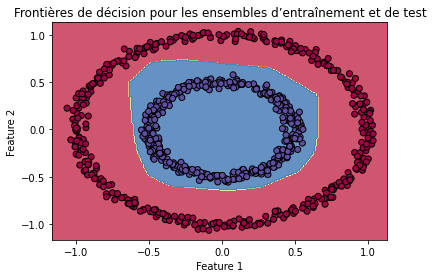

In [14]:
import numpy as np
h = 0.01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model_change_neurons_number.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype(int)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Frontières de décision pour les ensembles d’entraînement et de test')
plt.show()


### Tous les changement à la fois

Epoch 1/300
25/25 [==============================] - 3s 24ms/step - loss: 0.7044 - accuracy: 0.4737 - val_loss: 0.6955 - val_accuracy: 0.4500
Epoch 2/300
25/25 [==============================] - 0s 10ms/step - loss: 0.6845 - accuracy: 0.4913 - val_loss: 0.6794 - val_accuracy: 0.4600
Epoch 3/300
25/25 [==============================] - 0s 13ms/step - loss: 0.6682 - accuracy: 0.4988 - val_loss: 0.6646 - val_accuracy: 0.5200
Epoch 4/300
25/25 [==============================] - 0s 9ms/step - loss: 0.6513 - accuracy: 0.5125 - val_loss: 0.6461 - val_accuracy: 0.5450
Epoch 5/300
25/25 [==============================] - 0s 8ms/step - loss: 0.6309 - accuracy: 0.5562 - val_loss: 0.6239 - val_accuracy: 0.5600
Epoch 6/300
25/25 [==============================] - 0s 9ms/step - loss: 0.6038 - accuracy: 0.5938 - val_loss: 0.5945 - val_accuracy: 0.5800
Epoch 7/300
25/25 [==============================] - 0s 9ms/step - loss: 0.5701 - accuracy: 0.7000 - val_loss: 0.5580 - val_accuracy: 0.7350
Epoch 8/30

<AxesSubplot:>

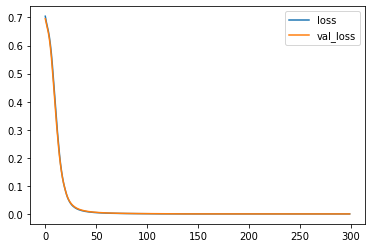

In [ ]:
model_all = Sequential()

model_all.add(Dense(20, activation='relu', input_shape=(2,)))
model_all.add(Dense(20, activation='relu'))

model_all.add(Dense(1, activation='sigmoid'))

model_all.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

history_all = model_all.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test))
history_all_df = pd.DataFrame(history_all.history)
history_all_df.loc[:, ['loss', 'val_loss']].plot()

1661/1661 [==============================] - 6s 3ms/step


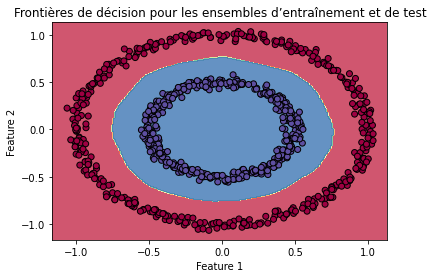

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
h = 0.01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model_all.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype(int)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Frontières de décision pour les ensembles d’entraînement et de test')
plt.show()


| Model improvement technique* | What does it do? |
| ----- | ----- |
| **Add more layers** | Each layer *potentially* increases the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data, more layers is often referred to as making your neural network *deeper*. |
| **Add more hidden units** | Similar to the above, more hidden units per layer means a *potential* increase in learning capabilities of the model, more hidden units is often referred to as making your neural network *wider*. |
| **Fitting for longer (more epochs)** | Your model might learn more if it had more opportunities to look at the data. |
| **Changing the activation functions** | Some data just can't be fit with only straight lines (like what we've seen), using non-linear activation functions can help with this (hint, hint). |
| **Change the learning rate** | Less model specific, but still related, the learning rate of the optimizer decides how much a model should change its parameters each step, too much and the model overcorrects, too little and it doesn't learn enough. |
| **Change the loss function** | Again, less model specific but still important, different problems require different loss functions. For example, a binary cross entropy loss function won't work with a multi-class classification problem. |
